<a href="https://colab.research.google.com/github/MohamedShoaib3/Algorithms_python/blob/main/Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install ucimlrepo

# 📂 1. Load Dataset

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
x = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# metadata
print(secondary_mushroom.metadata)

# variable information
print(secondary_mushroom.variables)


{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'venue': 'Scientific Reports', 'year': 2021, 'journal': None, '

### Mushroom Dataset Description

**Target Variable (Binary Class):**  
- `edible = e`  
- `poisonous = p` (also includes mushrooms of unknown edibility)  

---

### Features (20 variables: nominal = n, metrical = m)

1. **cap-diameter (m):** float number in cm  
2. **cap-shape (n):**  
   - bell = b  
   - conical = c  
   - convex = x  
   - flat = f  
   - sunken = s  
   - spherical = p  
   - others = o  
3. **cap-surface (n):**  
   - fibrous = i  
   - grooves = g  
   - scaly = y  
   - smooth = s  
   - shiny = h  
   - leathery = l  
   - silky = k  
   - sticky = t  
   - wrinkled = w  
   - fleshy = e  
4. **cap-color (n):**  
   - brown = n  
   - buff = b  
   - gray = g  
   - green = r  
   - pink = p  
   - purple = u  
   - red = e  
   - white = w  
   - yellow = y  
   - blue = l  
   - orange = o  
   - black = k  
5. **does-bruise-bleed (n):**  
   - bruises-or-bleeding = t  
   - no = f  
6. **gill-attachment (n):**  
   - adnate = a  
   - adnexed = x  
   - decurrent = d  
   - free = e  
   - sinuate = s  
   - pores = p  
   - none = f  
   - unknown = ?  
7. **gill-spacing (n):**  
   - close = c  
   - distant = d  
   - none = f  
8. **gill-color (n):** see `cap-color` + none = f  
9. **stem-height (m):** float number in cm  
10. **stem-width (m):** float number in mm  
11. **stem-root (n):**  
    - bulbous = b  
    - swollen = s  
    - club = c  
    - cup = u  
    - equal = e  
    - rhizomorphs = z  
    - rooted = r  
12. **stem-surface (n):** see `cap-surface` + none = f  
13. **stem-color (n):** see `cap-color` + none = f  
14. **veil-type (n):**  
    - partial = p  
    - universal = u  
15. **veil-color (n):** see `cap-color` + none = f  
16. **has-ring (n):**  
    - ring = t  
    - none = f  
17. **ring-type (n):**  
    - cobwebby = c  
    - evanescent = e  
    - flaring = r  
    - grooved = g  
    - large = l  
    - pendant = p  
    - sheathing = s  
    - zone = z  
    - scaly = y  
    - movable = m  
    - none = f  
    - unknown = ?  
18. **spore-print-color (n):** see `cap-color`  
19. **habitat (n):**  
    - grasses = g  
    - leaves = l  
    - meadows = m  
    - paths = p  
    - heaths = h  
    - urban = u  
    - waste = w  
    - woods = d  
20. **season (n):**  
    - spring = s  
    - summer = u  
    - autumn = a  
    - winter = w  

---

### Class Labels
- **edible = e**  
- **poisonous = p**  


In [4]:
x

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [5]:
y

,class
0,p
1,p
2,p
3,p
4,p
...,...
61064,p
61065,p
61066,p
61067,p


## Mushroom Classification Project

### Problem Description
The goal of this project is to classify mushrooms as **edible (e)** or **poisonous (p)** based on 20 descriptive features such as cap shape, cap color, stem characteristics, habitat, and season.  
This is a **binary classification problem** where the target variable is the mushroom class (`edible` or `poisonous`).  

---

### Project Workflow

#### 1. Exploratory Data Analysis (EDA)
- Inspect the dataset structure (rows, columns, data types).  
- Check for missing values and duplicates.  
- Visualize distributions of categorical features (bar plots) and numeric features (histograms, boxplots).  
- Explore correlations between features and the target class.  
- Look for class imbalance in the target variable (edible vs poisonous).  

#### 2. Data Cleaning & Preprocessing
- Handle missing values or unknown entries if present.  
- Encode categorical features (e.g., **One-Hot Encoding** or **Label Encoding**).  
- Scale numerical features (e.g., **StandardScaler** or **MinMaxScaler**).  
- Stratify the dataset when splitting into **training and test sets** to maintain class balance.  
- If class imbalance is significant, apply oversampling techniques (e.g., **SMOTE**).  

#### 3. Feature Selection
To reduce dimensionality and improve generalization, apply feature selection techniques such as:  
- **Filter Methods:** Use statistical tests (e.g., Chi-square, ANOVA F-test, mutual information) to rank features.  
- **Wrapper Methods:** Apply Recursive Feature Elimination (**RFE**) with models like Logistic Regression or Decision Trees.  
- **Embedded Methods:** Leverage feature importance from models (e.g., Decision Tree, Random Forest, Lasso Regression).  
- Compare model performance before and after feature selection to evaluate impact.  

#### 4. Model Training & Evaluation
Train and evaluate the following classification models:  
- **Logistic Regression**  
- **Decision Tree**  
- **Random Forest**  
- **Support Vector Machine (SVM)**  
- **K-Nearest Neighbors (KNN)**  
- **Naive Bayes**  

For each model:  
- Train on the **training set**.  
- Evaluate on the **test set** using:  
  - **Classification Report** (Precision, Recall, F1-score, Accuracy)  
  - **Confusion Matrix**  
  - **Cross-validation (optional)** for stability check  

#### 5. Hyperparameter Tuning
To improve model performance, apply hyperparameter optimization techniques:  
- **Grid Search:** Exhaustively search all combinations of parameters (good for small parameter spaces).  
- **Random Search:** Randomly sample parameter combinations (more efficient for large parameter spaces).  
- **Bayesian Optimization:** Iteratively choose hyperparameters based on past performance (efficient for complex models like Random Forest, SVM, or KNN).  

Compare tuned models with baseline models to measure improvement.  

#### 6. Feature Importance
- Extract **feature importance** from Decision Tree and Random Forest models.  
- Rank features to identify the most influential ones for classification.  
- Use feature importance as a basis for feature selection and model simplification.  

#### 7. Model Comparison
- Compare performance across all models (baseline, tuned, and with feature selection).  
- Use metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to decide the best-performing model.
- Create plot of ROC-AUC curve of each model with different color for comparison  
- Summarize results in a **comparison table** or **bar plot**.  

---

#### 8. Save best models as pickle files

---

### Final Deliverables
- Preprocessed dataset ready for classification.  
- Performance evaluation of six classification models.  
- Insights on class imbalance and handling techniques.  
- Feature selection results (filter, wrapper, and embedded methods).  
- Hyperparameter tuning results from Grid Search, Random Search, and Bayesian Optimization.  
- Feature importance ranking for better model interpretability.  
- Final comparison and recommendation of the best-performing model for mushroom classification.  
- pickle files of the saved models


# 2. Exploratory Data Analysis (EDA)

## 2.1 Dataset Shape

In [6]:
x.shape

(61069, 20)

In [7]:
y.shape

(61069, 1)

## 2.2 Dataset Info

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

## 2.3 Statistical Summary

In [9]:
x.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


## 2.4 Missing Values

In [10]:
x.isnull().sum()

,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-spacing,25063
gill-color,0
stem-height,0
stem-width,0


In [11]:
y.isnull().sum()

,0
class,0


## 2.5 Duplicate Rows

In [12]:
x.duplicated().sum()

np.int64(146)

## 2.6 Target Variable Distribution

class
p        33888
e        27181
Name: count, dtype: int64


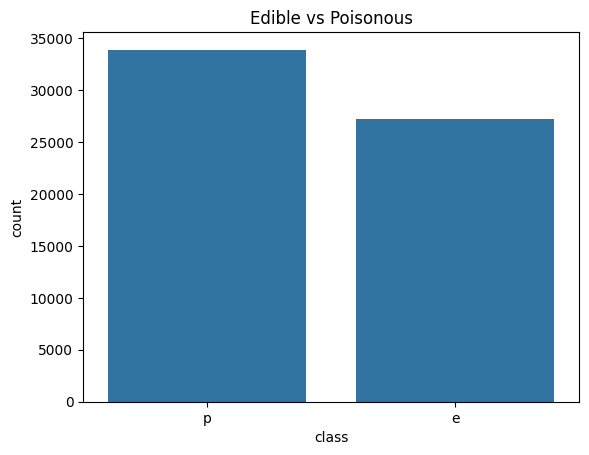

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

print(y.value_counts())
sns.countplot(x=y.squeeze())
plt.title("Edible vs Poisonous")
plt.show()

##2.7 Feature Distributions

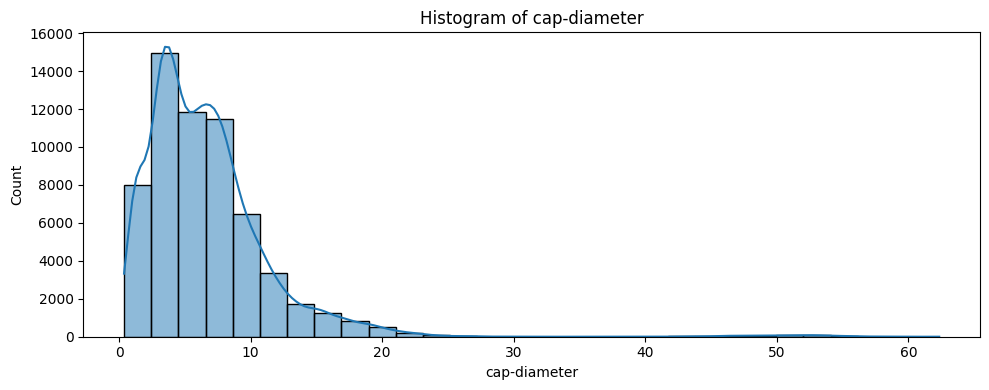

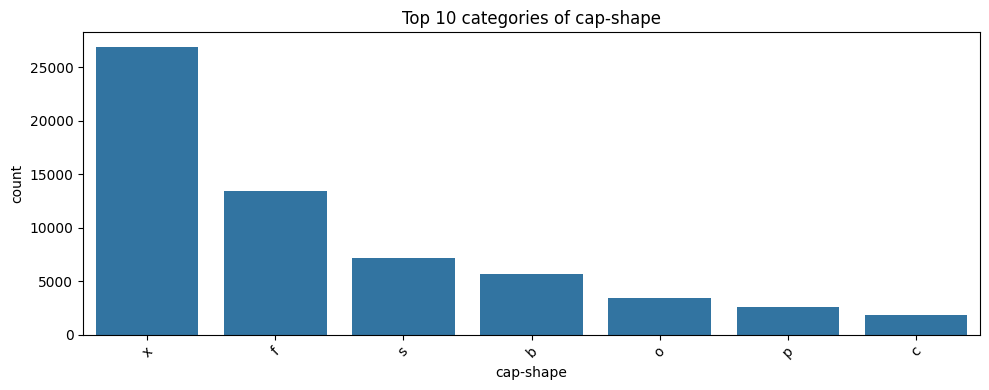

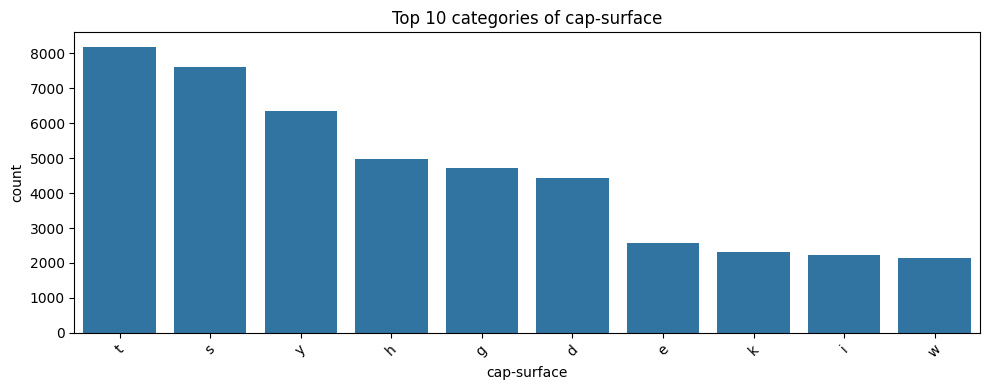

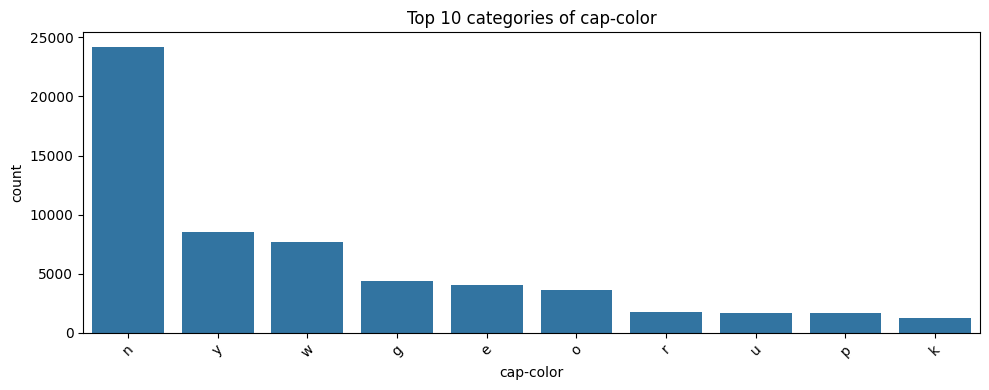

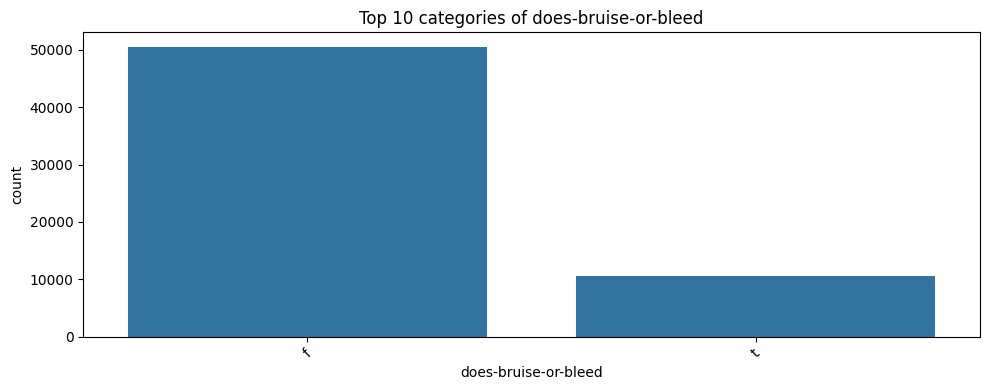

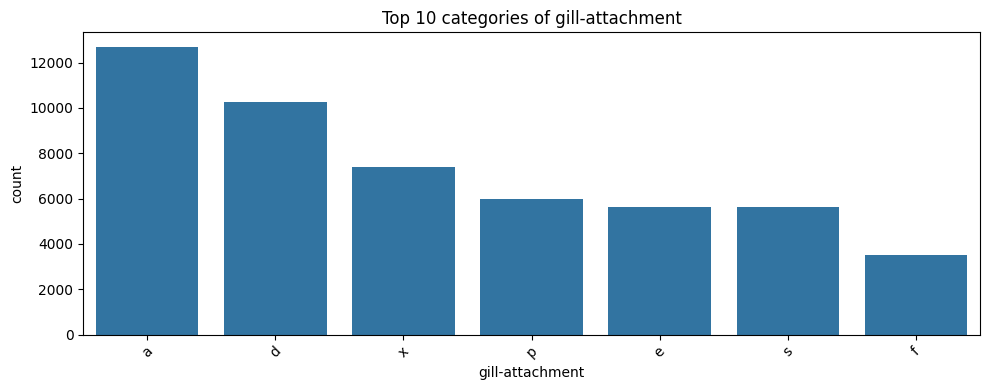

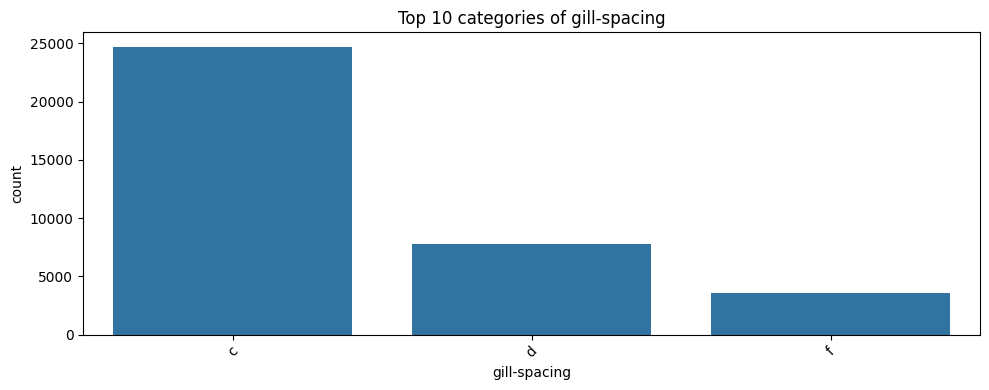

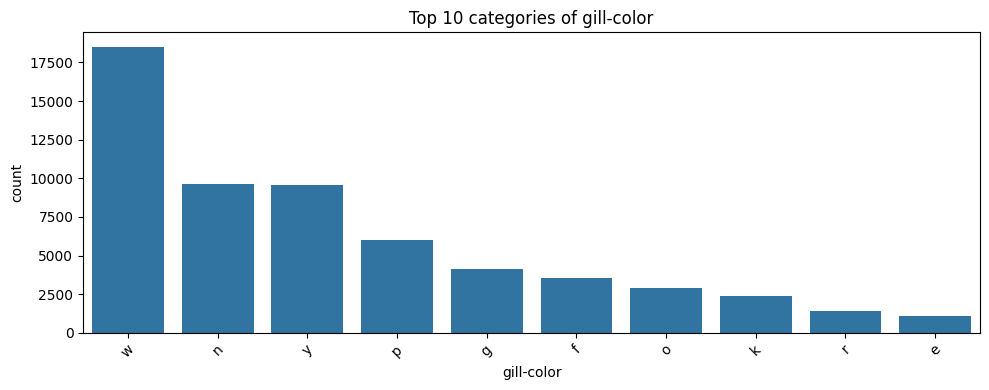

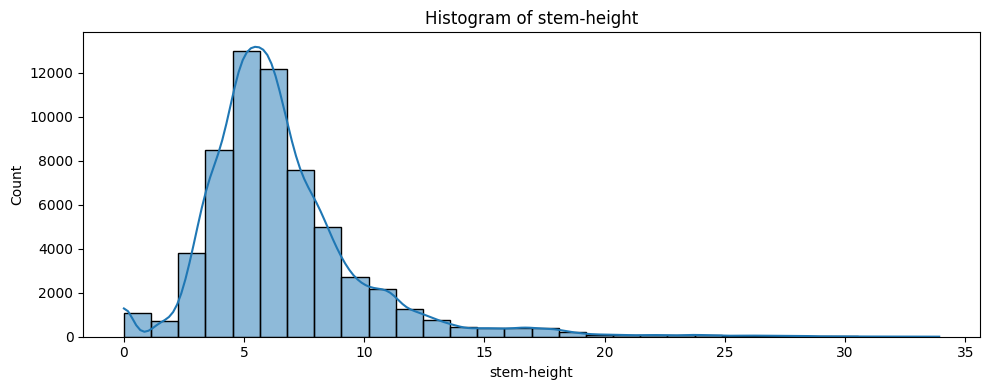

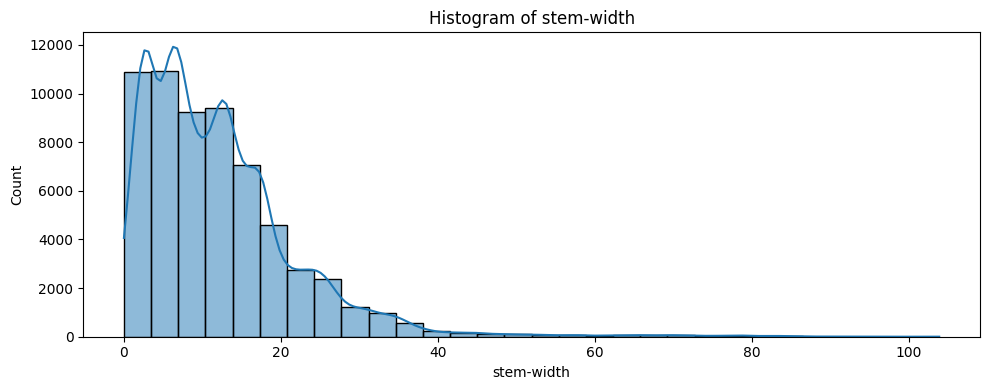

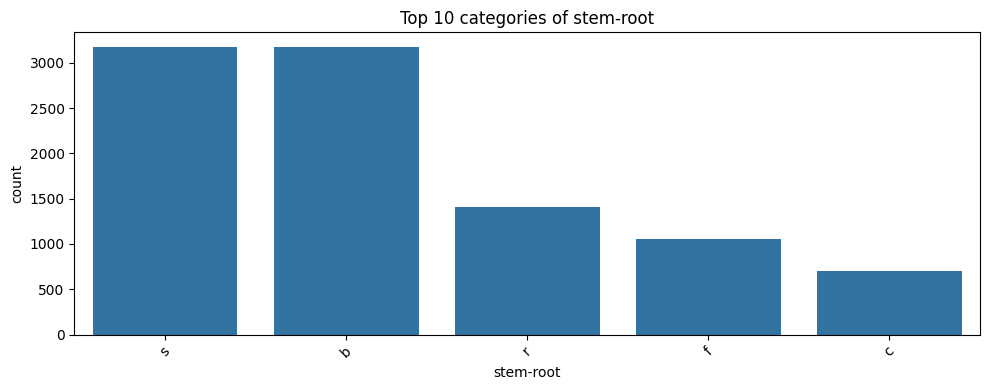

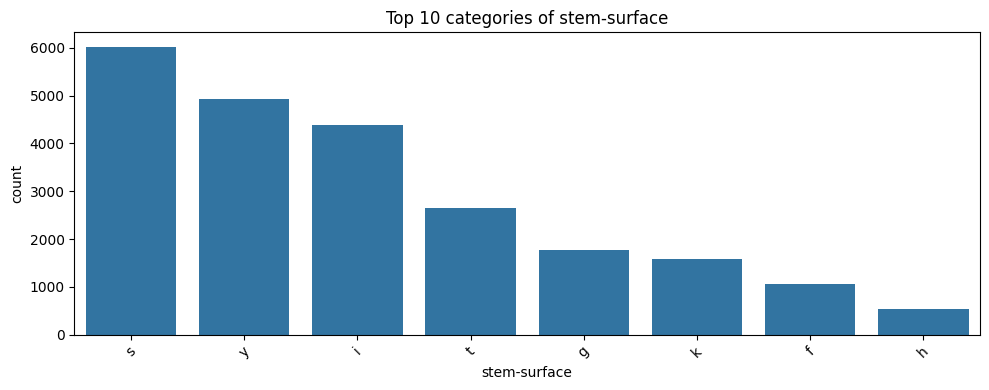

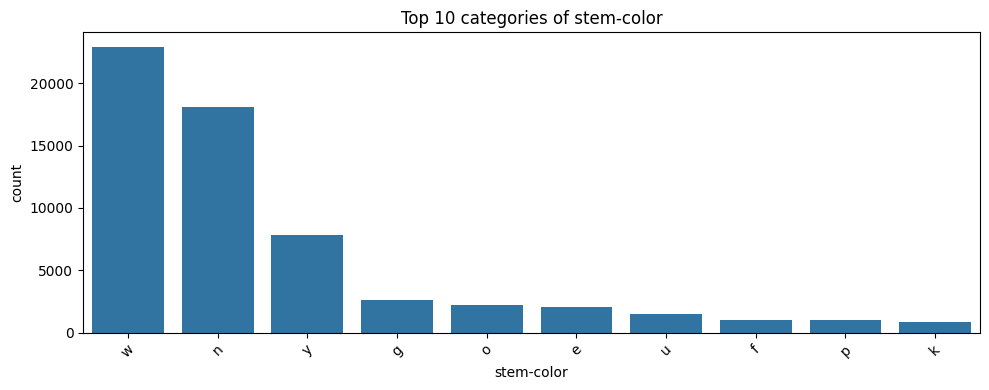

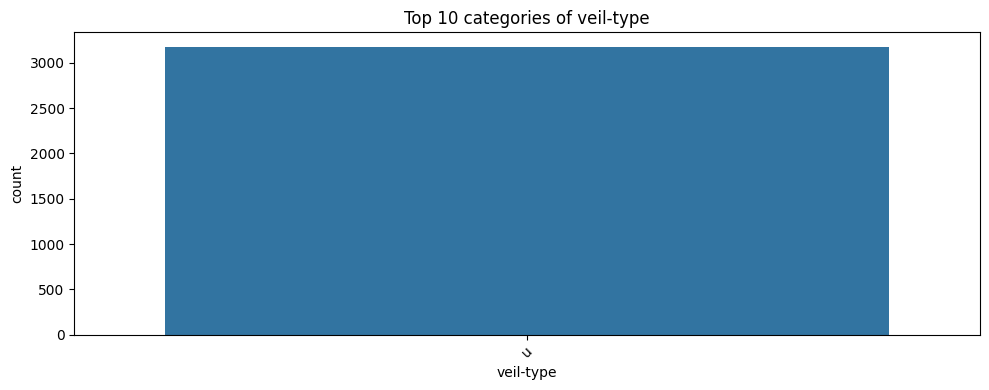

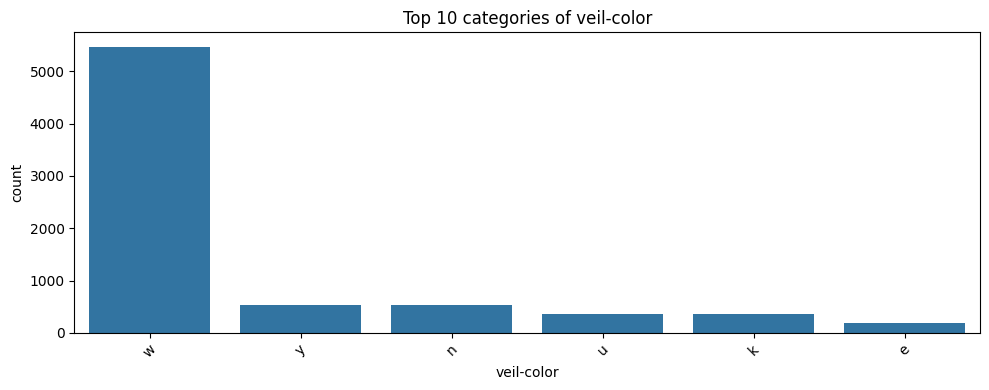

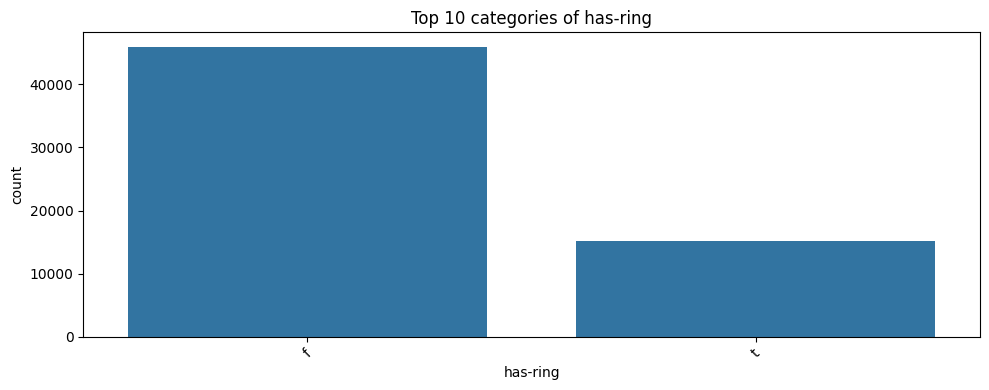

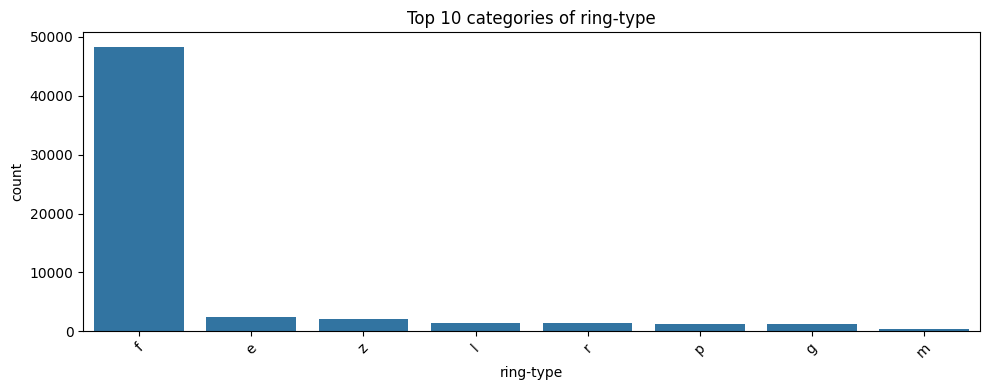

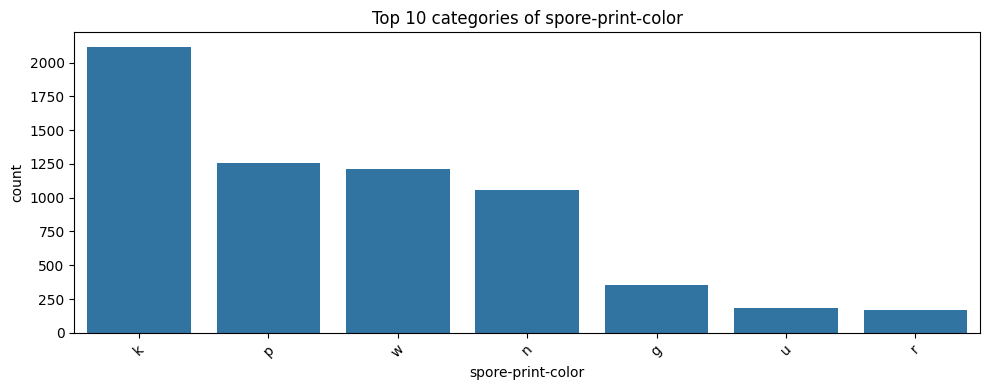

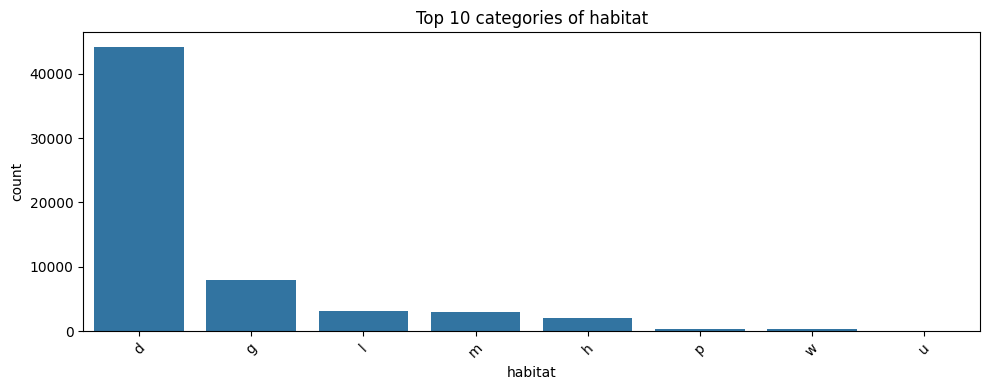

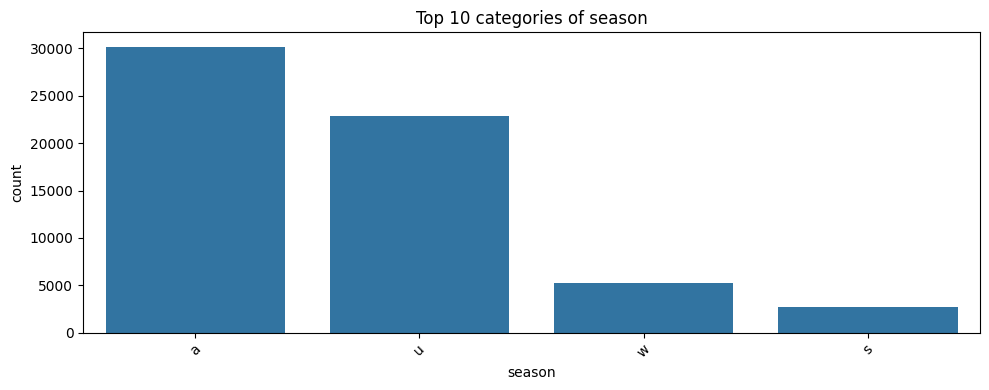

In [14]:
for col in x.columns:
    plt.figure(figsize=(10,4))

    if x[col].dtype != 'object':
        sns.histplot(data=x, x=col, bins=30, kde=True)
        plt.title(f"Histogram of {col}")
    else:
        sns.countplot(x=col, data=x, order=x[col].value_counts().iloc[:10].index)
        plt.title(f"Top 10 categories of {col}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# 3. Data Cleaning & Preprocessing
## 3.1 Handle Missing Values

In [15]:
missing_cols = ['cap-surface', 'gill-attachment', 'gill-spacing',
                'stem-root', 'stem-surface', 'veil-type',
                'veil-color', 'ring-type', 'spore-print-color']

x = x.drop(columns=missing_cols)

print("Shape after dropping columns with missing values:", x.shape)
print("Remaining columns:", x.columns.tolist())

Shape after dropping columns with missing values: (61069, 11)
Remaining columns: ['cap-diameter', 'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'has-ring', 'habitat', 'season']


##3.2 Encode Categorical Features

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode target y
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Display mapping
print("Target Encoding Mapping:")
for cls, val in zip(le_target.classes_, le_target.transform(le_target.classes_)):
    print(f"{cls} -> {val}")

# Encode all features
x_encoded = x.copy()
for col in x_encoded.columns:
    le = LabelEncoder()
    x_encoded[col] = le.fit_transform(x_encoded[col].astype(str))
x_encoded

Target Encoding Mapping:
e -> 0
p -> 1


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,681,6,6,0,10,777,859,11,1,0,3
1,814,6,6,0,10,881,969,11,1,0,2
2,562,6,6,0,10,862,924,11,1,0,3
3,572,2,1,0,10,663,748,11,1,0,3
4,619,6,6,0,10,737,870,11,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
61064,73,5,11,0,2,1595,3913,12,0,0,0
61065,82,2,11,0,2,1520,3660,12,0,0,0
61066,82,5,11,0,2,1588,3928,12,0,0,2
61067,79,2,11,0,2,1558,3661,12,0,0,2


##3.3 Scale Numerical Features

In [17]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_cols = x_encoded.select_dtypes(include=['int64', 'float64']).columns

# Scale numeric columns
scaler = StandardScaler()
x_encoded[numeric_cols] = scaler.fit_transform(x_encoded[numeric_cols])

x_encoded.head()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,-1.042105,0.915714,-0.045582,-0.458029,0.835268,-1.475534,-0.684995,0.798799,1.738751,-0.492721,1.768817
1,-0.876952,0.915714,-0.045582,-0.458029,0.835268,-1.287137,-0.613045,0.798799,1.738751,-0.492721,0.860194
2,-1.189874,0.915714,-0.045582,-0.458029,0.835268,-1.321556,-0.642479,0.798799,1.738751,-0.492721,1.768817
3,-1.177456,-0.954657,-1.622346,-0.458029,0.835268,-1.682046,-0.757598,0.798799,1.738751,-0.492721,1.768817
4,-1.119094,0.915714,-0.045582,-0.458029,0.835268,-1.547994,-0.677800,0.798799,1.738751,-0.492721,1.768817


##3.4 Train-Test Split (with Stratify)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_encoded, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"Train shape: {x_train.shape}")
print(f"Test shape: {x_test.shape}")

Train shape: (48855, 11)
Test shape: (12214, 11)


## 3.5 Check Class Imbalance

In [22]:
import pandas as pd

class_counts = pd.Series(y_encoded).value_counts(normalize=True)
print("Class Distribution:")
print(class_counts)

Class Distribution:
1    0.554913
0    0.445087
Name: proportion, dtype: float64


#4. Feature Selection
## 4.1 Filter Methods (Chi-Square Test for Categorical Features)

In [27]:
from sklearn.feature_selection import chi2, SelectKBest
X_chi = x.copy()
y_chi = y.copy()

le = LabelEncoder()
for col in X_chi.columns:
    X_chi[col] = le.fit_transform(X_chi[col])

y_chi = y_chi.replace({'e': 0, 'p': 1})

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_chi, y_chi)

chi2_scores = pd.DataFrame({
    'Feature': X_chi.columns,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

chi2_scores

/tmp/ipython-input-3504873484.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_chi = y_chi.replace({'e': 0, 'p': 1})


,Feature,Chi2 Score
6,stem-width,1.651751e+06
0,cap-diameter,6.160491e+05
5,stem-height,1.488728e+05
1,cap-shape,7.810306e+02
7,stem-color,6.740732e+02
4,gill-color,3.113171e+02
9,habitat,2.757530e+02
10,season,2.051296e+02
8,has-ring,1.520365e+02
2,cap-color,6.971015e+01


##4.2 Recursive Feature Elimination (RFE)

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use RandomForest as the base model for RFE
model = RandomForestClassifier(random_state=42)

# Initialize RFE (keep top 5 features, adjust as needed)
rfe_selector = RFE(model, n_features_to_select=5)
rfe_selector = rfe_selector.fit(X_chi, y_chi)

# Create DataFrame with RFE results
rfe_results = pd.DataFrame({
    'Feature': X_chi.columns,
    'Ranking': rfe_selector.ranking_
}).sort_values(by='Ranking', ascending=True)

rfe_results

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

,Feature,Ranking
0,cap-diameter,1
2,cap-color,1
5,stem-height,1
4,gill-color,1
6,stem-width,1
7,stem-color,2
1,cap-shape,3
9,habitat,4
3,does-bruise-or-bleed,5
8,has-ring,6


##4.3 Embedded Methods (Feature Importance)

In [29]:
# Train RandomForest to get feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_chi, y_chi)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_chi.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Feature,Importance
6,stem-width,0.181906
5,stem-height,0.128445
0,cap-diameter,0.116654
4,gill-color,0.113606
7,stem-color,0.102276
2,cap-color,0.097853
1,cap-shape,0.085046
3,does-bruise-or-bleed,0.052542
8,has-ring,0.047941
9,habitat,0.047937


#5. Modeling & Evaluation
##5.1 Train Multiple Models

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

results


Logistic Regression Accuracy: 0.6023
Confusion Matrix:
[[2404 3032]
 [1825 4953]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.44      0.50      5436
           1       0.62      0.73      0.67      6778

    accuracy                           0.60     12214
   macro avg       0.59      0.59      0.58     12214
weighted avg       0.60      0.60      0.59     12214


Decision Tree Accuracy: 0.9814
Confusion Matrix:
[[5327  109]
 [ 118 6660]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5436
           1       0.98      0.98      0.98      6778

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214


Random Forest Accuracy: 0.9948
Confusion Matrix:
[[5399   37]
 [  26 6752]]
Classification Report:
              precision    recall  f1-sc

{'Logistic Regression': 0.6023415752415261,
 'Decision Tree': 0.9814147699361389,
 'Random Forest': 0.9948419846078271,
 'SVM': 0.9158342885213689,
 'KNN': 0.9880465040117897}

##5.2 Compare Model Performance

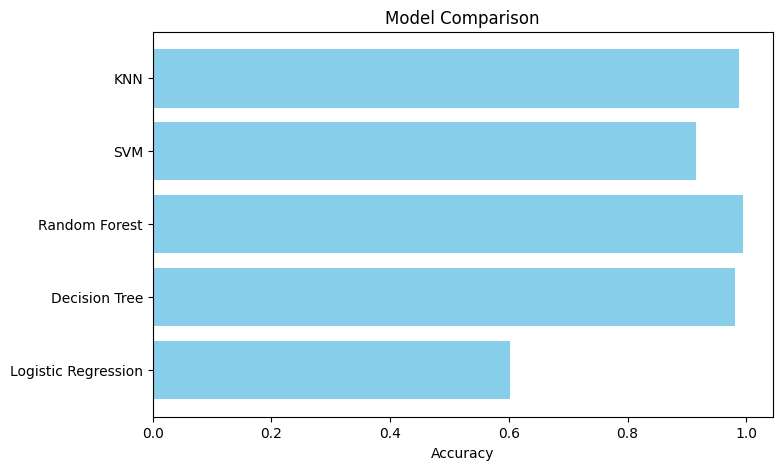

,Model,Accuracy
0,Logistic Regression,0.602342
1,Decision Tree,0.981415
2,Random Forest,0.994842
3,SVM,0.915834
4,KNN,0.988047


In [31]:
import matplotlib.pyplot as plt

# Convert results to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Plot
plt.figure(figsize=(8, 5))
plt.barh(results_df["Model"], results_df["Accuracy"], color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.show()

results_df

##5.3 Hyperparameter Tuning (GridSearchCV for Random Forest)

In [33]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9945553167536586


##5.4 Final Model Evaluation

In [34]:
best_model = grid_search.best_estimator_

# Predict
y_pred_best = best_model.predict(x_test)

# Metrics
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Final Model Accuracy: 0.9953332241689864
Confusion Matrix:
[[5406   30]
 [  27 6751]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5436
           1       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



#6. Feature Importance
##6.1 Feature Importance from Decision Tree & Random Forest

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names
feature_names = x_train.columns

# Feature importances
dt_importance = models["Decision Tree"].feature_importances_
rf_importance = best_rf_model.feature_importances_

# Plotting Decision Tree feature importance
indices_dt = np.argsort(dt_importance)[::-1]
plt.figure(figsize=(12,6))
plt.bar(range(len(dt_importance)), dt_importance[indices_dt], align='center')
plt.xticks(range(len(dt_importance)), feature_names[indices_dt], rotation=90)
plt.title("Decision Tree Feature Importance")
plt.tight_layout()
plt.show()

# Plotting Random Forest feature importance
indices_rf = np.argsort(rf_importance)[::-1]
plt.figure(figsize=(12,6))
plt.bar(range(len(rf_importance)), rf_importance[indices_rf], align='center')
plt.xticks(range(len(rf_importance)), feature_names[indices_rf], rotation=90)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

NameError: name 'best_rf_model' is not defined